## Imports & Config

In [85]:
import sys
from pathlib import Path
import importlib

import dataloader
import null_analysis
import stats_analysis
importlib.reload(dataloader)
importlib.reload(null_analysis)
importlib.reload(stats_analysis)

# make src importable
sys.path.append(str(Path("..") / "src"))

from dataloader import load_random_gauges
from null_analysis import gauge_null_and_missing_days
from stats_analysis import describe_per_gauge, aggregate_describe, correlation_matrix, plot_histograms, scatter_plots

DATA_DIR = Path("..") / "data"
RESULTS_DIR = Path("..") / "results"

# 1) Load data (100 random gauges)
gauges = load_random_gauges(DATA_DIR, n_samples=100, seed=42, sep=";")
list(gauges.keys())[:5]  # show first gauge IDs


['ID_703', 'ID_202', 'ID_121', 'ID_803', 'ID_355']

## Null analysis

In [86]:
summary = gauge_null_and_missing_days(gauges)

summary

,n_null_values,n_missing_days,n_days_present,start_date,end_date
gauge_id,,,,,
ID_703,0,0,14244,1981-01-01,2019-12-31
ID_202,0,0,14244,1981-01-01,2019-12-31
ID_121,0,0,14244,1981-01-01,2019-12-31
ID_803,0,0,14244,1981-01-01,2019-12-31
ID_355,0,0,14244,1981-01-01,2019-12-31
...,...,...,...,...,...
ID_606,0,0,14244,1981-01-01,2019-12-31
ID_791,0,0,14244,1981-01-01,2019-12-31
ID_94,0,0,14244,1981-01-01,2019-12-31


## Statistical analysis

In [79]:
# Columns to ignore
ignore_cols = ["YYYY", "MM", "DD", "DOY", 'lai_low_veg']
# 'lai_low_veg' stays the same over time (+- 0.1) and thus provides no information

# Drop them from each gauge's DataFrame
gauges_filtered = {
    gauge_id: df.drop(columns=ignore_cols, errors="ignore")
    for gauge_id, df in gauges.items()
}

In [80]:
# One gauge used as a representative
example_gauge_id = list(gauges.keys())[0]
example_df = gauges_filtered[example_gauge_id]

# List all columns(parameters)
params = list(example_df.columns)
print(params)

['2m_temp_max', '2m_temp_mean', '2m_temp_min', '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u', '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'swe', 'surf_net_solar_rad_max', 'surf_net_solar_rad_mean', 'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press', 'total_et', 'prec', 'volsw_123', 'volsw_4', 'date']


In [81]:
# Features to analyze:
features = ['2m_temp_max', '2m_temp_mean', '2m_temp_min', '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u', '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'swe', 'surf_net_solar_rad_max', 'surf_net_solar_rad_mean', 'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press', 'total_et', 'prec', 'volsw_123', 'volsw_4']

In [82]:
# Calculate basic statistical values for each parameter per basin and across all basins
desc_per_gauge = describe_per_gauge(gauges_filtered)
desc_global = aggregate_describe(gauges_filtered)

# Show global summary
desc_global


,count,mean,std,min,25%,50%,75%,max
2m_temp_max,1424400.0,9.977812,9.063854,-25.10,3.00,10.10,17.10,37.40
2m_temp_mean,1424400.0,5.786033,8.595252,-30.00,-0.40,5.90,12.60,30.60
2m_temp_min,1424400.0,1.618356,8.310175,-37.50,-3.60,1.80,8.00,25.40
2m_dp_temp_max,1424400.0,4.465318,7.919232,-34.80,-1.00,4.90,10.70,26.40
2m_dp_temp_mean,1424400.0,2.108199,8.144021,-37.80,-3.30,2.60,8.50,21.10
2m_dp_temp_min,1424400.0,-0.438591,8.629919,-42.50,-5.90,0.30,6.30,20.20
10m_wind_u,1424400.0,0.413613,1.396187,-6.20,-0.30,0.20,1.00,8.90
10m_wind_v,1424400.0,0.075524,1.088438,-8.20,-0.50,0.10,0.70,8.00
fcst_alb,1424400.0,0.242597,0.146076,0.07,0.14,0.17,0.35,0.80
lai_high_veg,1424400.0,2.631079,0.979219,0.70,1.80,2.60,3.40,4.90


In [83]:
# Inspect one gauge's correlation matrix
corr = correlation_matrix(gauges_filtered[example_gauge_id])
# How do all parameters correlate to the prec parameter
target = "prec"
corr_with_target = corr[target].sort_values(ascending=False)
corr_with_target

prec                       1.000000
10m_wind_u                 0.380828
2m_dp_temp_mean            0.208658
2m_dp_temp_max             0.205789
2m_dp_temp_min             0.192999
2m_temp_min                0.160944
lai_high_veg               0.138746
total_et                   0.087808
2m_temp_mean               0.080752
volsw_123                  0.055598
fcst_alb                   0.029161
2m_temp_max                0.014145
10m_wind_v                -0.007724
swe                       -0.025698
volsw_4                   -0.036577
surf_net_solar_rad_mean   -0.215126
surf_net_solar_rad_max    -0.238728
surf_press                -0.264694
surf_net_therm_rad_max    -0.466067
surf_net_therm_rad_mean   -0.481612
Name: prec, dtype: float64

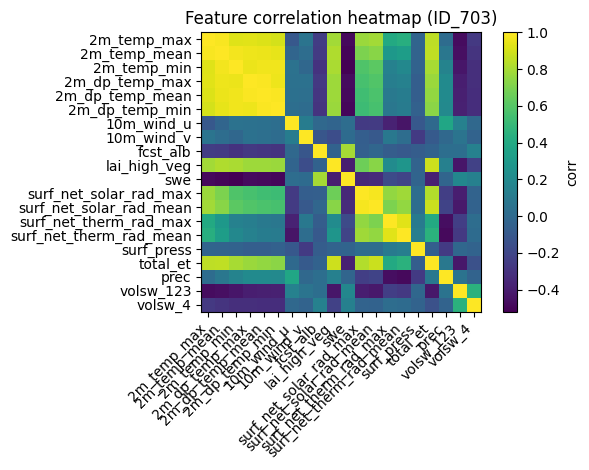

In [84]:
import matplotlib.pyplot as plt


corr_sub = example_df[features].corr()

plt.imshow(corr_sub, interpolation="nearest")
plt.xticks(range(len(features)), features, rotation=45, ha="right")
plt.yticks(range(len(features)), features)
plt.colorbar(label="corr")
plt.title(f"Feature correlation heatmap ({example_gauge_id})")
plt.tight_layout()
plt.show()


In [74]:
features_to_check = features
target = "prec"

scatter_plots(
    gauge_df=example_df,
    gauge_id=example_gauge_id,
    features=features_to_check,
    target=target,
    out_dir=RESULTS_DIR / "stats" / "scatter_plots",
)


In [48]:
# Create histograms
plot_histograms(
    gauges_filtered[example_gauge_id],
    columns=features,
    out_dir=RESULTS_DIR / "stats" / "histograms",
    gauge_id=example_gauge_id,
)

## Preprocessing